<a href="https://colab.research.google.com/github/SaraAljuraybah/Data-Mining-Project/blob/main/Reports/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")
df = pd.read_excel("Raw_dataset.xlsx")
print("Shape:", df.shape)
df.head()

Shape: (3028, 47)


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
0,16,2,2,2,0,1,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,3.0,2.6
1,19,1,3,1,0,1,1,1,1,0,...,1,1,0,1,1,4,1.0,1.0,3.4,1.6
2,18,2,4,2,0,0,0,0,0,0,...,0,0,0,1,1,5,5.0,1.0,5.0,2.6
3,20,1,3,2,0,0,1,1,1,0,...,1,1,0,1,5,4,3.0,2.0,5.0,3.0
4,20,2,3,2,1,1,1,1,0,0,...,0,0,0,2,4,5,3.0,1.0,3.6,3.0


In [ ]:
df.describe()


,Age,Gender,Year of Study,Name of College,Use Facebook,Use Instagram,Use Twitter,Use Snapchat,Use LinkedIn,Use Tiktok,...,Misinformation,Decreased face-to-face Interactions,Others.2,Time Wasted on Social Media,Difficulty in Concentrating on Studies,Exposure to Negative Content,Concern Over Personal Data Security,Feeling of Inadequacy Due to Social Comparisons,meanBenefits,meanChallenges
count,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,...,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000
mean,18.352378,1.424042,2.205086,1.476222,0.445178,0.782034,0.468296,0.524108,0.233157,0.625495,...,0.529723,1.244055,0.971268,3.469617,3.078930,3.243065,3.338111,2.950198,3.640819,3.215984
std,2.058045,0.502235,0.874640,0.619389,0.497068,0.454810,0.534244,0.499501,0.422911,0.484075,...,0.507728,1.674212,1.644333,1.589963,1.507621,1.555822,1.394496,1.482595,0.971860,1.011929
min,14.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.200000,3.000000,2.600000
50%,18.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,3.800000,3.000000,3.800000,3.200000
75%,19.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,4.600000,4.000000,4.400000,4.000000
max,48.000000,4.000000,5.000000,3.000000,1.000000,11.000000,11.000000,1.000000,1.000000,1.000000,...,2.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000


The statistical summary provides an overview of the dataset. For example, the Age attribute shows an average of around 18 years, which is reasonable since the dataset represents undergraduate students. However, the maximum value of 48 years indicates the presence of an outlier that should be considered during preprocessing.

Some attributes such as Gender and Name of College are shown as numerical values in the summary, but in reality, they are categorical features that have been encoded using numbers. Therefore, their mean and standard deviation are not meaningful and should be interpreted through frequency counts instead.

In [14]:
df.isnull().sum()

,0
Age,0
Gender,0
Year of Study,0
Name of College,0
Use Facebook,0
Use Instagram,0
Use Twitter,0
Use Snapchat,0
Use LinkedIn,0
Use Tiktok,0



The missing values analysis shows that there are no null or missing entries in the dataset. This is an advantage since it ensures the dataset is complete and reduces the need for imputation or dropping rows/columns. Having a complete dataset allows us to focus on other preprocessing tasks such as handling outliers, encoding categorical features, and normalization.

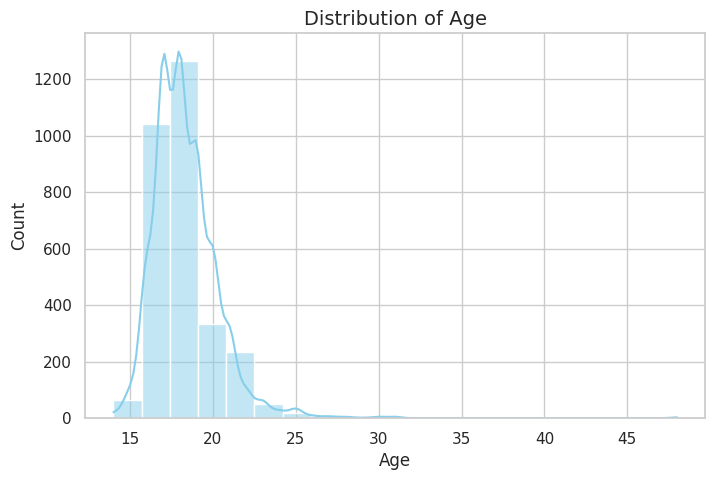

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

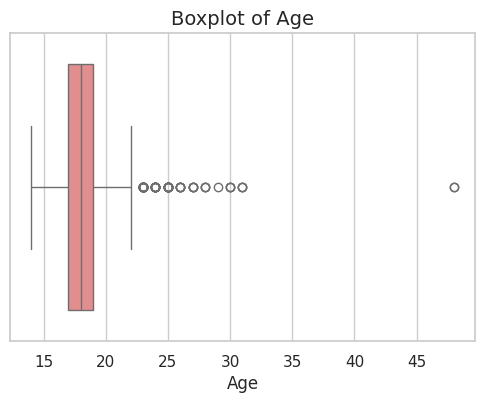

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Age"], color="lightcoral")
plt.title("Boxplot of Age", fontsize=14)
plt.xlabel("Age")
plt.show()


The boxplot of the Age attribute shows that the majority of students are between 17 and 20 years old, with a median age of 18. Several outliers are present, including values above 25 and one extreme case at 48 years, which may indicate data entry errors or older students. These outliers should be carefully considered during preprocessing.

/tmp/ipython-input-193758888.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette="Set2")


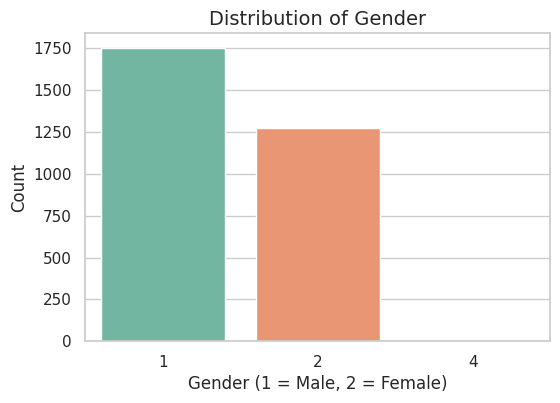

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Gender"], palette="Set2")
plt.title("Distribution of Gender", fontsize=14)
plt.xlabel("Gender (1 = Male, 2 = Female)")
plt.ylabel("Count")
plt.show()


The bar plot of the Gender attribute shows the distribution of male and female students. The dataset indicates that there are more male students compared to female students. However, the appearance of an unexpected value (4) suggests the presence of data entry or coding errors that need to be addressed during preprocessing.

/tmp/ipython-input-3735750875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Use Instagram"],palette="pastel")


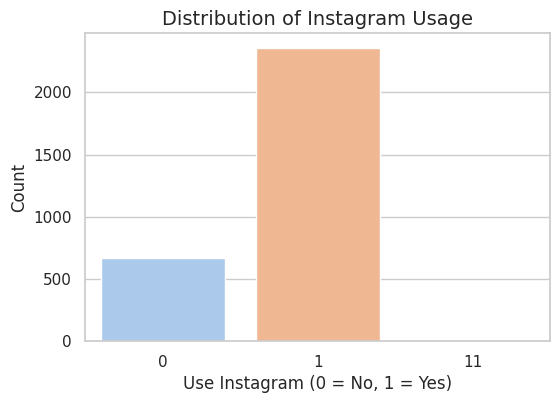

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["Use Instagram"],palette="pastel")
plt.title("Distribution of Instagram Usage", fontsize=14)
plt.xlabel("Use Instagram (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [19]:
print("Unique values in Use Instagram:", df["Use Instagram"].unique())

invalid_count = df[df["Use Instagram"] == 11].shape[0]
print("Number of invalid entries (11):", invalid_count)

Unique values in Use Instagram: [ 1  0 11]
Number of invalid entries (11): 1


The plot shows Instagram usage distribution: most students use Instagram (1), while fewer do not (0). One invalid entry (11) was detected, which should be corrected during preprocessing.

/tmp/ipython-input-2544408081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Impact on Academic Performance"], palette="viridis")


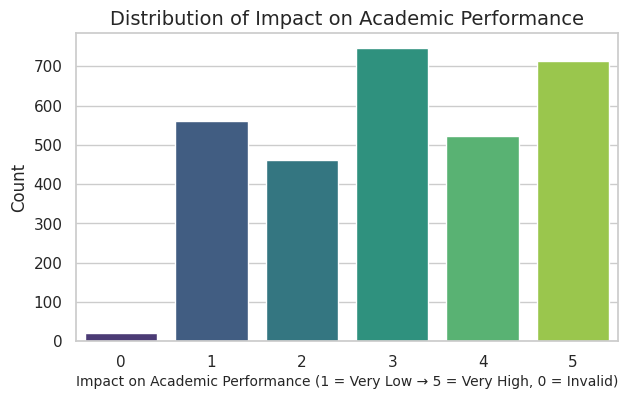

Impact on Academic Performance
3    747
5    713
1    561
4    523
2    462
0     22
Name: count, dtype: int64


In [25]:
plt.figure(figsize=(7,4))
sns.countplot(x=df["Impact on Academic Performance"], palette="viridis")
plt.title("Distribution of Impact on Academic Performance", fontsize=14)
plt.xlabel("Impact on Academic Performance (1 = Very Low → 5 = Very High, 0 = Invalid)", fontsize=10)
plt.ylabel("Count")
plt.show()

print(df["Impact on Academic Performance"].value_counts())


The plot shows the distribution of the class label Impact on Academic Performance. Most students fall between levels 2 to 5, with the highest counts at level 3 (747) and level 5 (713). Fewer students are at levels 1 (561) and 2 (462), while only 22 invalid entries (0) were detected. These invalid values will need to be handled during preprocessing.